In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.linspace(0.,1.,10) # training set
X_valid = np.linspace(0.,1.,100) # validation set
X_test = np.linspace(0.,1.,100) # test set
np.random.seed(10)
t_valid = np.sin(4*np.pi*X_valid) + 0.3 * np.random.randn(100)
t_test = np.sin(4*np.pi*X_valid) + 0.3 * np.random.randn(100)
t_train = np.sin(4*np.pi*X_train) + 0.3 * np.random.randn(10)
t_valid_true = np.sin(4*np.pi*X_valid) #true function of validation set
t_train_true = np.sin(4*np.pi*X_train) #true function of training set

X_true = np.linspace(0.,1.,1000000)
t_true = np.sin(4*np.pi*X_true)

In [3]:
N = len(X_train)
new_col = np.ones(N) #creates array of [1 1 ...(10)... 1] 
M = len(X_valid)
new_col2 = np.ones(M) #creates array of [1 1 ...(100)... 1] 

In [4]:
#Prediction Function via finding w matrix (weights) as Y = Xw
def reg(X,t):
    A = np.matmul(X.T,X)
    B = np.linalg.pinv(A)
    C = np.matmul(X.T,t)
    w = np.matmul(B,C)
    return w

In [5]:
#RMSE calculator which is used as performance indicator
def err(Y,t,N):
  diff_train = np.subtract(Y,t)
  err_train = np.dot(diff_train.T,diff_train)/N
  RMSE_train = np.sqrt(err_train)
  return RMSE_train

In [6]:
#Average error function
def avg_err(t_valid,t_valid_true):
    avgerror= t_valid-t_valid_true
    return np.average(avgerror)

In [7]:
#Initializing list to save the matrices of respective degree and save the rmse errors as well
X_t=[None]*10
X_v=[None]*100
X_te=[None]*100
Y_t=[None]*10
Y_v=[None]*100
Y_te=[None]*100
X_train = np.reshape(X_train,(10,1))
X_valid = np.reshape(X_valid,(100,1))
X_test = np.reshape(X_test,(100,1))
rmse_train=[]
rmse_valid=[]
rmse_test=[]
for Deg in range(0,10): #Deg is the Degree, i.e. M
  X = np.power(X_train,Deg)
  X1 = np.array(new_col)
  X1 = np.reshape(X1,(10,1))
  X_t[Deg]=X1

  Xv = np.power(X_valid,Deg)
  Xv1 = np.array(new_col2)
  Xv1 = np.reshape(Xv1,(100,1))
  X_v[Deg]=Xv1

  Xte = np.power(X_test,Deg)
  Xte1 = np.array(new_col2)
  Xte1 = np.reshape(Xte1,(100,1))
  X_te[Deg]=Xte1


  if(Deg==0): #for case M=0 only
    w = reg(X1,t_train) #training on training set
    Y1 = np.matmul(X,w)
    Y_t[Deg]=Y1 #saving
    RMSE_train = err(Y1,t_train,N) #error calculating
    rmse_train.append(RMSE_train) #saving

    wv = w
    Yv1 = np.matmul(Xv1,wv)
    Y_v[Deg]=Yv1
    RMSE_valid = err(Yv1,t_valid,M)
    rmse_valid.append(RMSE_valid)

    wte = w
    Yte1 = np.matmul(Xte1,wte)
    Y_te[Deg]=Yte1
    RMSE_test = err(Yv1,t_valid,M)
    rmse_test.append(RMSE_test)


  else: # for case M = 1-9
    X3 = X_t[Deg-1] #retreiving the previous degree matrix
    X = np.power(X_train,Deg) #applying power to the values
      #print(X)
    X3 = np.append(X3,X,axis=1)
    X_t[Deg]=X3

    w = reg(X3,t_train)  #Training
    Y3 = np.matmul(X3,w)
    Y_t[Deg]=Y3
    RMSE_train = err(Y3,t_train,N)
    rmse_train.append(RMSE_train)


    Xv3 = X_v[Deg-1]
    Xv = np.power(X_valid,Deg)
      #print(X)
    Xv3 = np.append(Xv3,Xv,axis=1)
    X_v[Deg]=Xv3
    #print(Deg)
    
    wv = w
    Yv3 = np.matmul(Xv3,wv)
    Y_v[Deg]=Yv3
    RMSE_valid = err(Yv3,t_valid,M)
    rmse_valid.append(RMSE_valid)



    Xte3 = X_te[Deg-1]
    Xte = np.power(X_test,Deg)
      #print(X)
    Xte3 = np.append(Xte3,Xte,axis=1)
    X_te[Deg]=Xte3
    #print(Deg)
    
    wte = w
    Yte3 = np.matmul(Xte3,wte)
    Y_te[Deg]=Yte3
    RMSE_test = err(Yte3,t_test,M)
    rmse_test.append(RMSE_test)

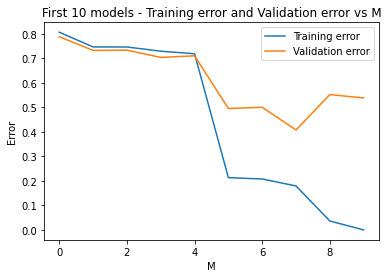

In [8]:
plt.plot(np.arange(10), rmse_train)
plt.plot(np.arange(10), rmse_valid)
plt.title("First 10 models - Training error and Validation error vs M")
plt.xlabel('M')
plt.ylabel('Error')
plt.legend(["Training error", "Validation error"], loc ="upper right")
plt.show()

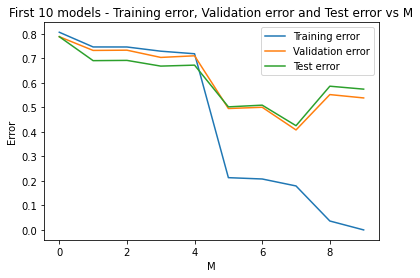


In the case of M = 0
Training error (RMSE) = 0.8069335767736721
Validation error (RMSE) = 0.7887998219028794
Test error (RMSE) = 0.7887998219028794

In the case of M = 1
Training error (RMSE) = 0.7469230898171269
Validation error (RMSE) = 0.7327430882838948
Test error (RMSE) = 0.6910361546759366

In the case of M = 2
Training error (RMSE) = 0.7467612576120681
Validation error (RMSE) = 0.733741638500866
Test error (RMSE) = 0.6920619990818945

In the case of M = 3
Training error (RMSE) = 0.7296271708224461
Validation error (RMSE) = 0.7041757411866872
Test error (RMSE) = 0.6687499773211786

In the case of M = 4
Training error (RMSE) = 0.7191537110568964
Validation error (RMSE) = 0.7108243956836768
Test error (RMSE) = 0.6727049292469399

In the case of M = 5
Training error (RMSE) = 0.21353574512205659
Validation error (RMSE) = 0.49567711382899987
Test error (RMSE) = 0.5024562148786792

In the case of M = 6
Training error (RMSE) = 0.20811507075927155
Validation error (RMSE) = 0.50077462131

In [9]:
plt.plot(np.arange(10), rmse_train)
plt.plot(np.arange(10), rmse_valid)
plt.plot(np.arange(10), rmse_test)
plt.title("First 10 models - Training error, Validation error and Test error vs M")
plt.xlabel('M')
plt.ylabel('Error')
plt.legend(["Training error", "Validation error", "Test error"], loc ="upper right")
plt.show()
print("")
for i in range(0,10):
  print("In the case of M = "+str(i))
  print("Training error (RMSE) = "+str(rmse_train[i]))
  print("Validation error (RMSE) = "+str(rmse_valid[i]))
  print("Test error (RMSE) = "+str(rmse_test[i]))
  print("")

In [10]:
#Plotting of graphs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


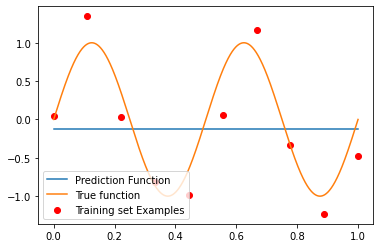

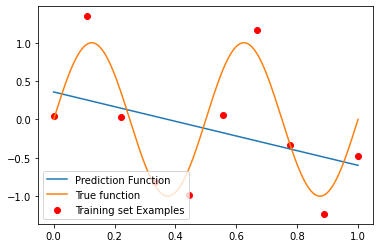

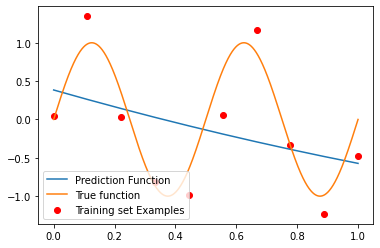

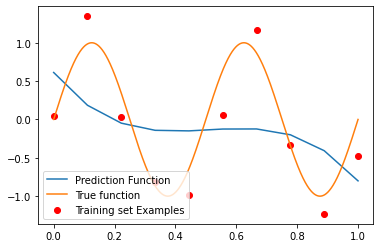

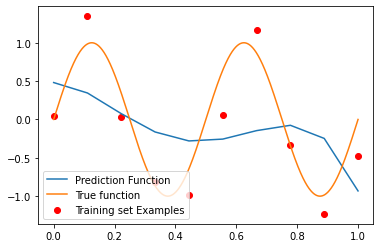

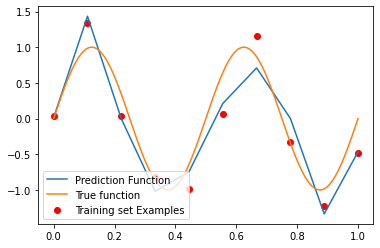

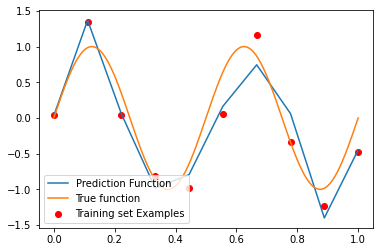

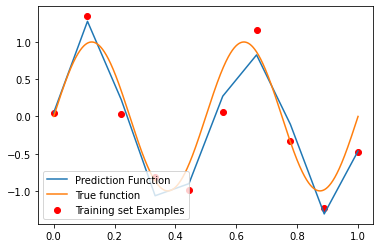

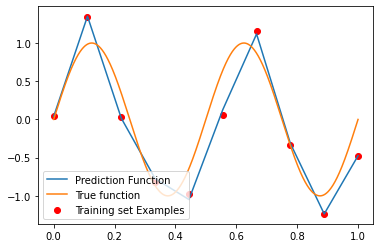

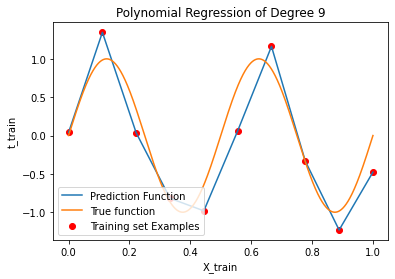

In [11]:
import matplotlib.pyplot as plt
f0 = plt.figure()
f1 = plt.figure()
f2 = plt.figure()
f3 = plt.figure()
f4 = plt.figure()
f5 = plt.figure()
f6 = plt.figure()
f7 = plt.figure()
f8 = plt.figure()
f9 = plt.figure()

plt.xlabel('X_train')
plt.ylabel('t_train')
for i in range(0,10):
  plt.title('Polynomial Regression of Degree {}'.format(i))
  if(i==0):
    ax1 = f0.add_subplot(111)
  if(i==1):
    ax1 = f1.add_subplot(111)
  if(i==2):
    ax1 = f2.add_subplot(111)
  if(i==3):
    ax1 = f3.add_subplot(111)
  if(i==4):
    ax1 = f4.add_subplot(111)
  if(i==5):
    ax1 = f5.add_subplot(111)
  if(i==6):
    ax1 = f6.add_subplot(111)
  if(i==7):
    ax1 = f7.add_subplot(111)
  if(i==8):
    ax1 = f8.add_subplot(111)
  if(i==9):
    ax1 = f9.add_subplot(111)
  ax1.scatter(X_train, t_train,color='red')
  ax1.plot(X_train, Y_t[i])
  ax1.plot(X_true, t_true)
  ax1.legend(["Prediction Function","True function","Training set Examples"], loc ="lower left")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


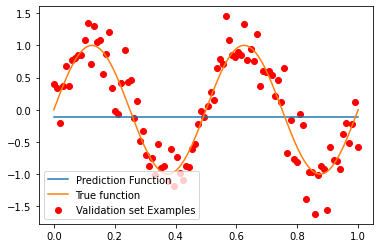

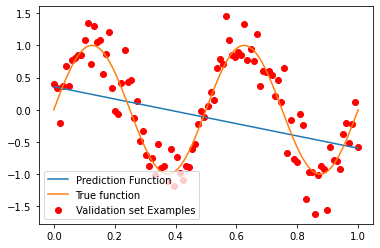

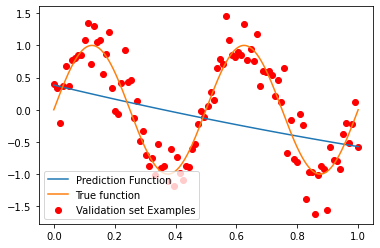

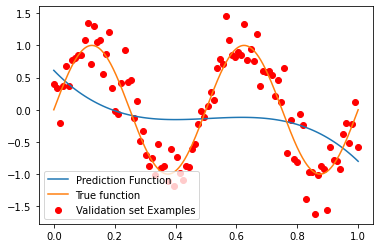

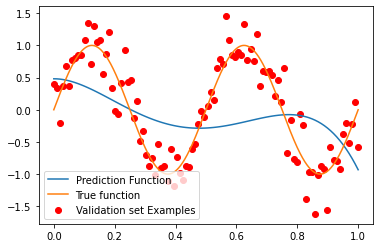

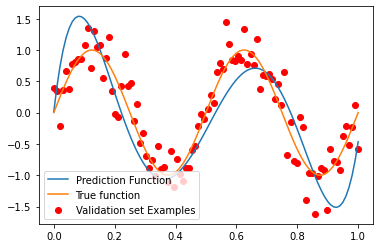

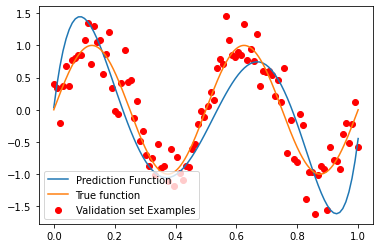

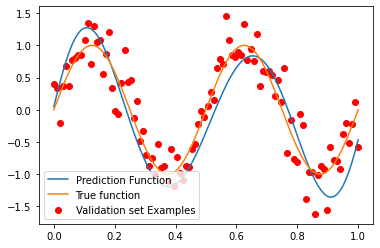

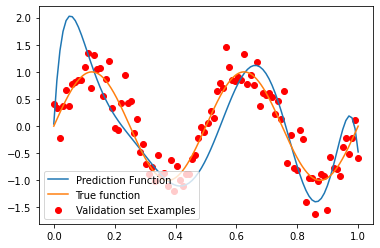

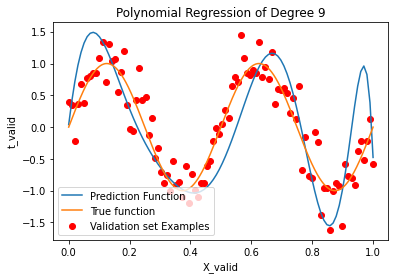

In [12]:
import matplotlib.pyplot as plt
f0 = plt.figure()
f1 = plt.figure()
f2 = plt.figure()
f3 = plt.figure()
f4 = plt.figure()
f5 = plt.figure()
f6 = plt.figure()
f7 = plt.figure()
f8 = plt.figure()
f9 = plt.figure()

plt.xlabel('X_valid')
plt.ylabel('t_valid')
for i in range(0,10):
  plt.title('Polynomial Regression of Degree {}'.format(i))
  if(i==0):
    bx1 = f0.add_subplot(111)
  if(i==1):
    bx1 = f1.add_subplot(111)
  if(i==2):
    bx1 = f2.add_subplot(111)
  if(i==3):
    bx1 = f3.add_subplot(111)
  if(i==4):
    bx1 = f4.add_subplot(111)
  if(i==5):
    bx1 = f5.add_subplot(111)
  if(i==6):
    bx1 = f6.add_subplot(111)
  if(i==7):
    bx1 = f7.add_subplot(111)
  if(i==8):
    bx1 = f8.add_subplot(111)
  if(i==9):
    bx1 = f9.add_subplot(111)
  bx1.scatter(X_valid, t_valid,color='red')
  bx1.plot(X_valid, Y_v[i])
  #bx1.plot(X_valid, t_valid_true)
  bx1.plot(X_true, t_true)
  bx1.legend(["Prediction Function", "True function","Validation set Examples"], loc ="lower left")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


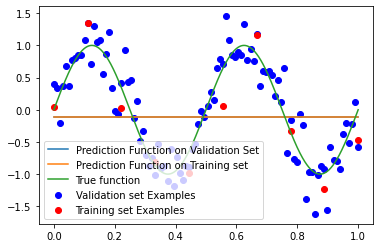

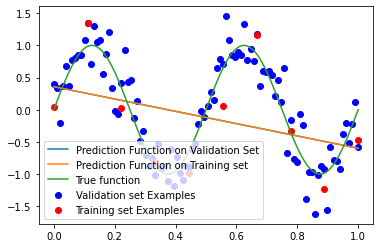

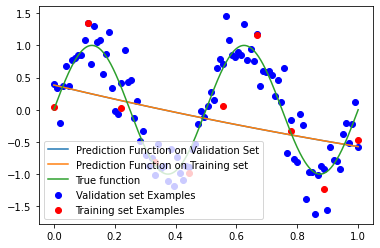

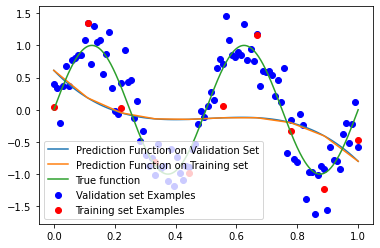

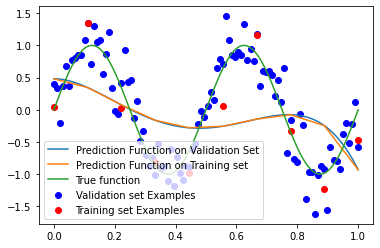

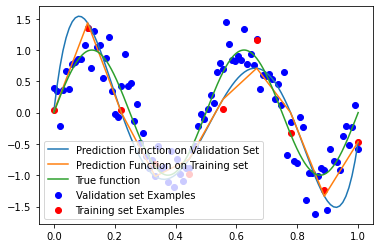

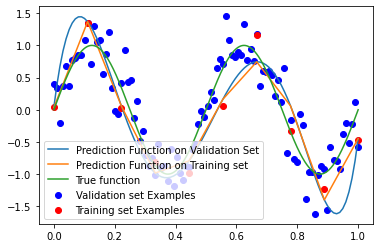

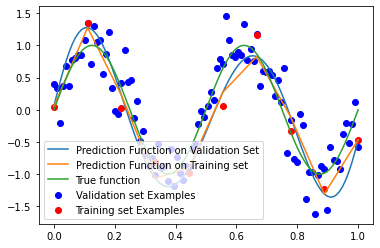

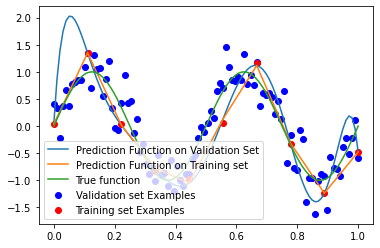

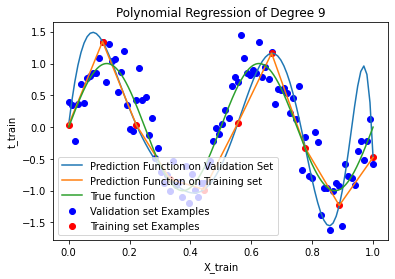

In [13]:
import matplotlib.pyplot as plt
f0 = plt.figure()
f1 = plt.figure()
f2 = plt.figure()
f3 = plt.figure()
f4 = plt.figure()
f5 = plt.figure()
f6 = plt.figure()
f7 = plt.figure()
f8 = plt.figure()
f9 = plt.figure()

plt.xlabel('X_train')
plt.ylabel('t_train')
for i in range(0,10):
  plt.title('Polynomial Regression of Degree {}'.format(i))
  if(i==0):
    ax1 = f0.add_subplot(111)
  if(i==1):
    ax1 = f1.add_subplot(111)
  if(i==2):
    ax1 = f2.add_subplot(111)
  if(i==3):
    ax1 = f3.add_subplot(111)
  if(i==4):
    ax1 = f4.add_subplot(111)
  if(i==5):
    ax1 = f5.add_subplot(111)
  if(i==6):
    ax1 = f6.add_subplot(111)
  if(i==7):
    ax1 = f7.add_subplot(111)
  if(i==8):
    ax1 = f8.add_subplot(111)
  if(i==9):
    ax1 = f9.add_subplot(111)
  ax1.scatter(X_valid, t_valid,color='blue',label="Validation set Examples")
  ax1.plot(X_valid, Y_v[i],label="Prediction Function on Validation Set")
  ax1.scatter(X_train, t_train,color='red',label="Training set Examples")
  ax1.plot(X_train, Y_t[i],label="Prediction Function on Training set")
  ax1.plot(X_true, t_true,label="True function")
  ax1.legend(loc ="lower left")
plt.show()

Polynomial Regression of Degree 0-9 on training set


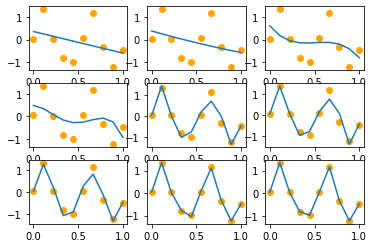

In [14]:
fig, axs = plt.subplots(3, 3)
counter=0
for i in range(0,3):
  for j in range(0,3):
    counter=counter+1
    axs[i, j].scatter(X_train, t_train,color='orange')
    axs[i, j].plot(X_train, Y_t[counter])
print("Polynomial Regression of Degree 0-9 on training set")
plt.show()

Polynomial Regression of Degree 0-9 on validation set


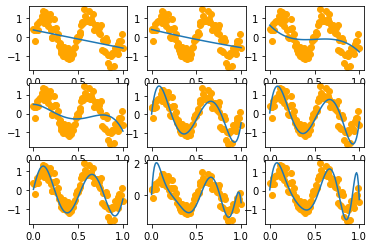

In [15]:
fig, axs = plt.subplots(3, 3)
counter=0
for i in range(0,3):
  for j in range(0,3):
    counter=counter+1
    axs[i, j].scatter(X_valid, t_valid,color='orange')
    axs[i, j].plot(X_valid, Y_v[counter])
print("Polynomial Regression of Degree 0-9 on validation set")
plt.show()

Polynomial Regression of Degree 0-9 on validation set


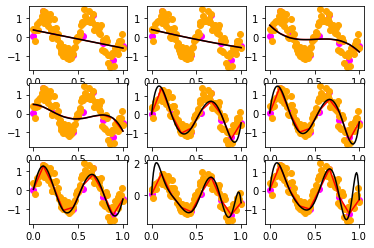

<Figure size 1080x720 with 0 Axes>

In [16]:
fig, axs = plt.subplots(3, 3)
counter=0
plt.figure(figsize=(15,10))
for i in range(0,3):
  for j in range(0,3):
    counter=counter+1
    axs[i, j].scatter(X_train, t_train,color='magenta')
    axs[i, j].plot(X_train, Y_t[counter],color='red')
    axs[i, j].scatter(X_valid, t_valid,color='orange')
    axs[i, j].plot(X_valid, Y_v[counter],color='black')
print("Polynomial Regression of Degree 0-9 on validation set")
plt.show()

0.02382499888106219


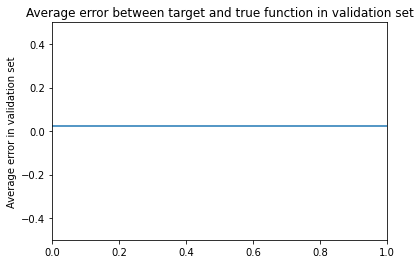

In [17]:
average_error_validation = avg_err(t_valid,t_valid_true)
print(average_error_validation)
plt.axhline(y = average_error_validation)
plt.ylabel('Average error in validation set')
plt.xlim([0, 1])
plt.ylim([-0.5, 0.5])
plt.title('Average error between target and true function in validation set')
plt.show()

In [18]:
#OVERFITTING SOLVE
D = 9              # degree

In [19]:
def reg(X,N,B,t):
  D = (N/2)*B
  E = np.matmul(X.T,X)
  F = D + E
  G = np.linalg.inv(F)
  H = np.matmul(X.T,t)
  W = np.matmul(G,H)
  return np.matmul(X,W)

In [20]:
#B matrix creating function
def Bmatrix(L):
  B_matrix=B_matrix=[[]]*10
  B_matrix = np.array(B_matrix)
  for i in range (0,D+1):
    P = [0]*10
    P[D-i]=2*L
    P = np.array(P)
    B_matrix = np.insert(B_matrix,0,P,axis=1)
    return B_matrix

[0.0002017881856742407, 0.3324740765492643, 0.3631981216290103, 0.3862547082802164, 0.40628689211952335, 0.4240253885256552, 0.43978348167933184, 0.4538127005385586, 0.46633967852957703, 0.47756588524228477, 0.48766652534380683, 0.4967917916665401, 0.5050694821595949, 0.5126080360203069, 0.519499477384357, 0.525822048985577, 0.5316424738207807, 0.5370178553255869, 0.541997255513462, 0.5466229983952346, 0.5509317444336644, 0.5549553765435915, 0.5587217319843745, 0.5622552085551583, 0.5655772683042531, 0.5687068575733492, 0.5716607585854784, 0.5744538848685011, 0.5770995304417187, 0.5796095808067411, 0.5819946922728592, 0.5842644449275192, 0.5864274735955893, 0.5884915803440092, 0.5904638314585777, 0.5923506413076349, 0.5941578450960576, 0.5958907621716648, 0.597554251271906, 0.5991527588752259, 0.6006903616311327, 0.6021708036927468, 0.6035975296475142, 0.6049737136361549, 0.606302285161417, 0.6075859520153439, 0.6088272206910567, 0.6100284145944821, 0.6111916903250157, 0.61231905226005

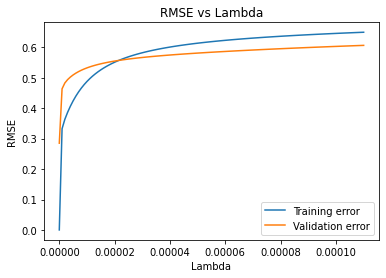

In [21]:
rmse_train_reg=[]
rmse_valid_reg=[]
rmse_test_reg=[]
rang = np.arange(0,0.00011,0.000001)
#step=0.1
counter=0
#rang = np.arange(0,1+step,step)
for i in rang:
  L=i
  B_matrix=B_matrix=[[]]*10
  B_matrix = np.array(B_matrix)
  for i in range (0,D+1):
    P = [0]*10
    P[D-i]=2*L
    P = np.array(P)
    B_matrix = np.insert(B_matrix,0,P,axis=1)
  #print(B_matrix)
  Y10_reg = reg(X_t[9],N,B_matrix,t_train)
  RMSE_train_reg = err(Y10_reg,t_train,N)
  rmse_train_reg.append(RMSE_train_reg)

  Yv10_reg = reg(X_v[9],M,B_matrix,t_valid)
  RMSE_valid_reg = err(Yv10_reg,t_valid,M)
  rmse_valid_reg.append(RMSE_valid_reg)

  Yte10_reg = reg(X_te[9],M,B_matrix,t_test)
  RMSE_test_reg = err(Yte10_reg,t_test,M)
  rmse_test_reg.append(RMSE_test_reg)


  ###Saving Y matrix of lambda 1 and 2 for plotting

  if(counter==2):
    B_matrix=Bmatrix(0.000001)
    Y11=reg(X_t[9],N,B_matrix,t_train)
    Yv11=reg(X_v[9],M,B_matrix,t_valid)
  elif(counter==4):
    #B_matrix = Bmatrix(0.00002)
    Y12=reg(X_t[9],N,B_matrix,t_train)
    Yv12=reg(X_v[9],M,B_matrix,t_valid)
  counter=counter+1
rmse_train_final = np.append(rmse_train,rmse_train_reg[3])
rmse_train_final = np.append(rmse_train_final,rmse_train_reg[5])
rmse_valid_final = np.append(rmse_valid,rmse_valid_reg[3])
rmse_valid_final = np.append(rmse_valid_final,rmse_valid_reg[5])
rmse_test_final = np.append(rmse_test,rmse_test_reg[3])
rmse_test_final = np.append(rmse_test_final,rmse_test_reg[5])
print(rmse_train_reg)
print(rmse_valid_reg)
print(rmse_test_reg)
rmse_train_reg = np.array(rmse_train_reg)
rmse_valid_reg = np.array(rmse_valid_reg)
plt.plot(rang, rmse_train_reg)
plt.plot(rang, rmse_valid_reg)
plt.legend(["Training error", "Validation error"], loc ="lower right")
plt.title('RMSE vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.show()

In [22]:
#From the plot above, Lambda 1 = 0.000001 is where overfitting is removed and Lambda 2 = 0.00002 where underfitting starts
#Overfitting region from 0 to 0.000001
#Underfitting region from 0.00002 and beyond

0.02382499888106219


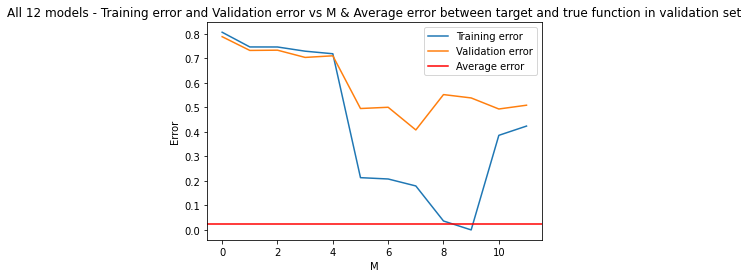

In [23]:
average_error_validation = avg_err(t_valid,t_valid_true)
print(average_error_validation)
plt.plot(np.arange(12), rmse_train_final)
plt.plot(np.arange(12), rmse_valid_final)
plt.axhline(y = average_error_validation,color='red')
plt.title("All 12 models - Training error and Validation error vs M & Average error between target and true function in validation set")
plt.xlabel('M')
plt.ylabel('Error')
plt.legend(["Training error", "Validation error", "Average error"], loc ="upper right")
plt.show()

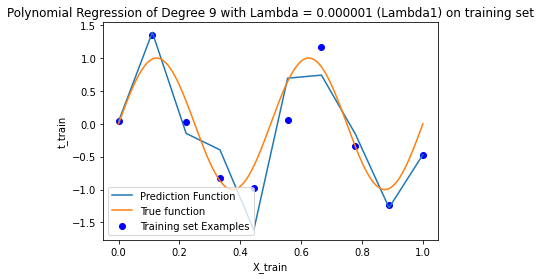

In [24]:
plt.xlabel('X_train')
plt.ylabel('t_train')
plt.title('Polynomial Regression of Degree 9 with Lambda = 0.000001 (Lambda1) on training set')
plt.scatter(X_train, t_train,color='blue')
#plt.scatter(X_train, t_train_true,color='red')
plt.plot(X_train, Y11)
plt.plot(X_true,  t_true)
plt.legend(["Prediction Function", "True function", "Training set Examples"], loc ="lower left")
plt.show()

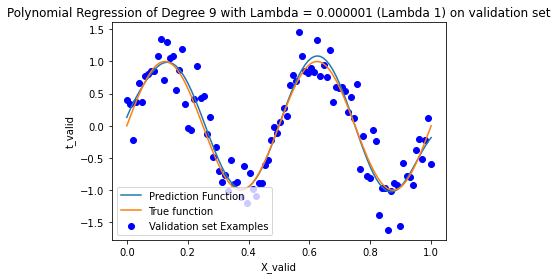

In [25]:
plt.xlabel('X_valid')
plt.ylabel('t_valid')
plt.title('Polynomial Regression of Degree 9 with Lambda = 0.000001 (Lambda 1) on validation set')
plt.scatter(X_valid, t_valid,color='blue')
#plt.scatter(X_valid, t_valid_true,color='red')
plt.plot(X_valid, Yv11)
plt.plot(X_true, t_true)
plt.legend(["Prediction Function", "True function", "Validation set Examples"], loc ="lower left")
plt.show()

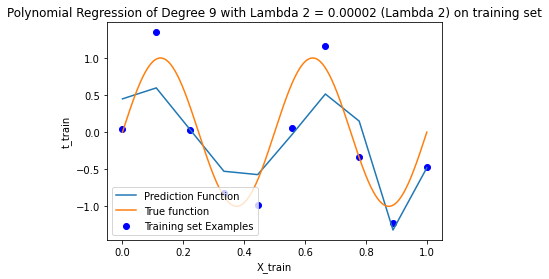

In [26]:
plt.xlabel('X_train')
plt.ylabel('t_train')
plt.title('Polynomial Regression of Degree 9 with Lambda 2 = 0.00002 (Lambda 2) on training set')
plt.scatter(X_train, t_train,color='blue')
#plt.scatter(X_train, t_train_true,color='red')
plt.plot(X_train, Y12)
plt.plot(X_true, t_true)
plt.legend(["Prediction Function", "True function", "Training set Examples"], loc ="lower left")
plt.show()

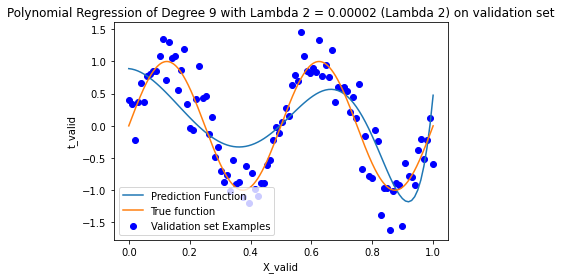

In [27]:
plt.xlabel('X_valid')
plt.ylabel('t_valid')
plt.title('Polynomial Regression of Degree 9 with Lambda 2 = 0.00002 (Lambda 2) on validation set')
plt.scatter(X_valid, t_valid,color='blue')
#plt.scatter(X_valid, t_valid_true,color='red')
plt.plot(X_valid, Yv12)
plt.plot(X_true, t_true)
plt.legend(["Prediction Function", "True function", "Validation set Examples"], loc ="lower left")
plt.show()

In [28]:
#To find the performance of all the models on the test: -

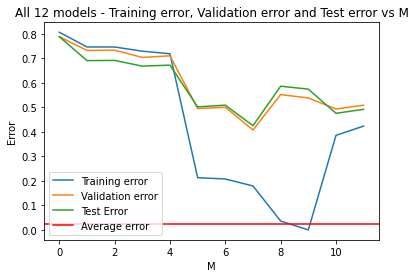

In [29]:
plt.plot(np.arange(12), rmse_train_final)
plt.plot(np.arange(12), rmse_valid_final)
plt.plot(np.arange(12), rmse_test_final)
plt.axhline(y = average_error_validation,color='red')
plt.title("All 12 models - Training error, Validation error and Test error vs M")
plt.xlabel('M')
plt.ylabel('Error')
plt.legend(["Training error", "Validation error", "Test Error", "Average error"], loc ="lower left")
plt.show()

In [30]:
print("From the above plots and Error versus M plot we observe the test set and its error. We can conclude that M = 9 with Lambda 1 = 0.000001 model \ni.e. the 11th model, is the best model as it has minimal error with no overfitting or underfitting issues.")

From the above plots and Error versus M plot we observe the test set and its error. We can conclude that M = 9 with Lambda 1 = 0.000001 model 
i.e. the 11th model, is the best model as it has minimal error with no overfitting or underfitting issues.
